# Kaggle titanic prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("/Users/akshaypoojary/Desktop/train.csv")
test = pd.read_csv("/Users/akshaypoojary/Desktop/test.csv")

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
alldata = train.append(test)

/var/folders/26/j3wjwwgj4yq97b52ngqjpprr0000gn/T/ipykernel_3196/488615021.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alldata = train.append(test)


In [9]:
alldata.shape

(1309, 12)

In [10]:
alldata.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
403,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,NaN,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [11]:
alldata.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
train[['Pclass','Survived']].groupby(["Pclass"],as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


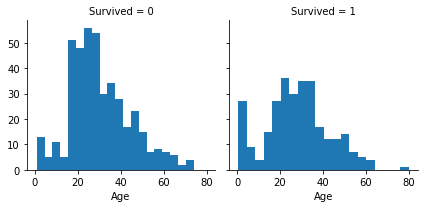

In [21]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist,'Age',bins = 20)

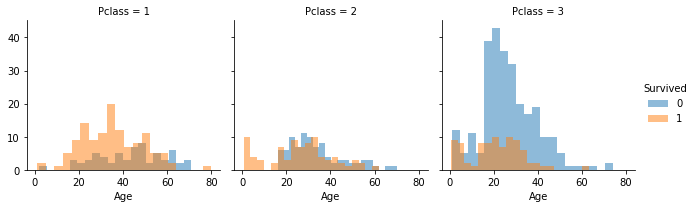

In [22]:
#grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid = sns.FacetGrid(train, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();

/Users/akshaypoojary/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/akshaypoojary/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


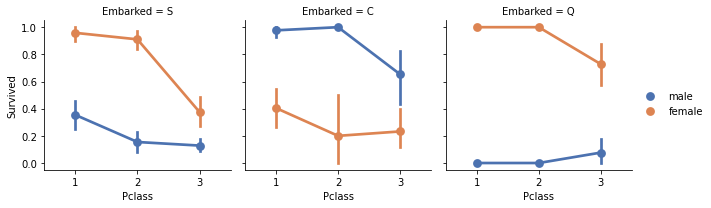

In [23]:
grid = sns.FacetGrid(train, col = 'Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex', palette = 'deep')
grid.add_legend()

/Users/akshaypoojary/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/akshaypoojary/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


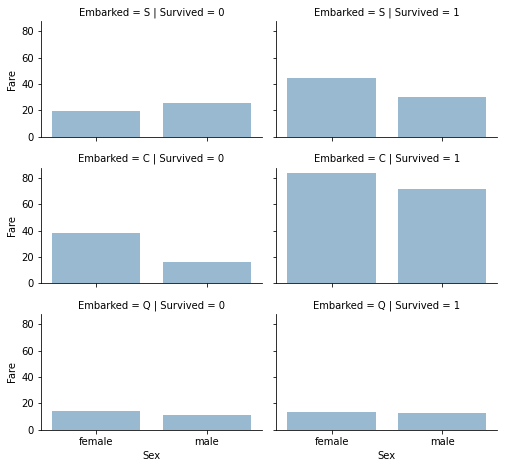

In [24]:
grid = sns.FacetGrid(train, row = 'Embarked',col = 'Survived',size=2.2, aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5, ci=None)
grid.add_legend()

In [25]:
alldata.shape

(1309, 12)

In [26]:
combine = [train, test]
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)



"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 12), (418, 11), (891, 12), (418, 11))

In [27]:
for dataset in combine:
    dataset['title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train['title'],train['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
for dataset in combine:
    dataset['title'] = dataset['title'].replace(['Dr','Lady','Major','Rev','Sir','Capt','Col','Countess','Don','Jonkheer','Dona'],"Rare")
    
    dataset['title'] = dataset['title'].replace('Mlle','Miss')
    dataset['title'] = dataset['title'].replace('Mme','Mrs')
    dataset['title'] = dataset['title'].replace('Ms','Miss')
    
train[['title','Survived']].groupby(['title'],as_index = False).mean().sort_values(by='Survived',ascending = False)

,title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [29]:
title_mapping = {'Mr':1,'Mrs':2,'Miss':3,'Rare':4}

for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [30]:
train = train.drop(['Name','PassengerId'],axis=1)
test = test.drop(['Name'],axis=1)
combine = [train,test]
train.shape,test.shape

((891, 11), (418, 11))

In [31]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1.0


/Users/akshaypoojary/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


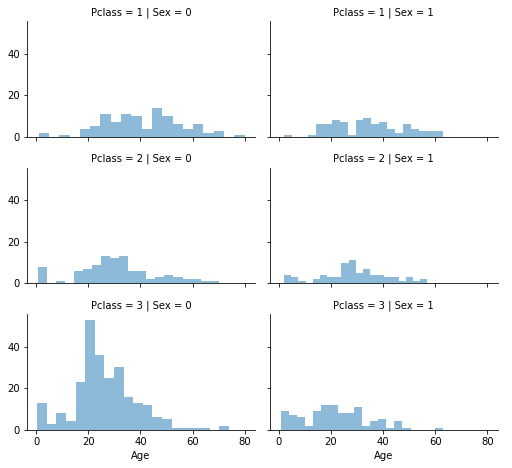

In [32]:
grid = sns.FacetGrid(train, row = 'Pclass', col = 'Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist,'Age', alpha = .5, bins = 20)
grid.add_legend()

In [33]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,2.0
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,1,1,1,35,1,0,113803,53.1000,C123,S,2.0
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1.0


In [35]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [36]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,2.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,2.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,1.0,"(32.0, 48.0]"


In [37]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,2.0
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,1,1,1,2,1,0,113803,53.1000,C123,S,2.0
4,0,3,0,2,0,0,373450,8.0500,NaN,S,1.0


In [38]:
train = train.drop(['Cabin'], axis=1)
combine = [train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,0,3,0,1,1,0,A/5 21171,7.2500,S,1.0
1,1,1,1,2,1,0,PC 17599,71.2833,C,2.0
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,S,3.0
3,1,1,1,2,1,0,113803,53.1000,S,2.0
4,0,3,0,2,0,0,373450,8.0500,S,1.0


In [39]:
train = train.drop(['Ticket'], axis=1)
combine = [train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,2.0
2,1,3,1,1,0,0,7.9250,S,3.0
3,1,1,1,2,1,0,53.1000,S,2.0
4,0,3,0,2,0,0,8.0500,S,1.0


In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
    
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
train = train.drop(['SibSp','Parch','FamilySize'], axis=1)
test = test.drop(['SibSp','Parch','FamilySize'], axis=1)
combine = [train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,0,3,0,1,7.2500,S,1.0,0
1,1,1,1,2,71.2833,C,2.0,0
2,1,3,1,1,7.9250,S,3.0,1
3,1,1,1,2,53.1000,S,2.0,0
4,0,3,0,2,8.0500,S,1.0,1


In [43]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [44]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,0,3
1,1,1,1,2,71.2833,1,2.0,0,2
2,1,3,1,1,7.9250,0,3.0,1,3
3,1,1,1,2,53.1000,0,2.0,0,2
4,0,3,0,2,8.0500,0,1.0,1,6


In [47]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,IsAlone,Age*Class
0,892,3,0,2,330911,7.8292,NaN,2,1.0,1,6
1,893,3,1,2,363272,7.0000,NaN,0,2.0,0,6
2,894,2,0,3,240276,9.6875,NaN,2,1.0,1,6
3,895,3,0,1,315154,8.6625,NaN,0,1.0,1,3
4,896,3,1,1,3101298,12.2875,NaN,0,2.0,0,3


In [48]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [49]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class,FareBand
0,0,3,0,1,0,0,1.0,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,1,2.0,0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,3.0,1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,2.0,0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1.0,1,6,"(7.91, 14.454]"
5,0,3,0,1,1,2,1.0,1,3,"(7.91, 14.454]"
6,0,1,0,3,3,0,1.0,1,3,"(31.0, 512.329]"
7,0,3,0,0,2,0,0.0,0,0,"(14.454, 31.0]"
8,1,3,1,1,1,0,2.0,0,3,"(7.91, 14.454]"
9,1,2,1,0,2,1,2.0,0,0,"(14.454, 31.0]"


In [50]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,IsAlone,Age*Class
0,892,3,0,2,330911,0,NaN,2,1.0,1,6
1,893,3,1,2,363272,0,NaN,0,2.0,0,6
2,894,2,0,3,240276,1,NaN,2,1.0,1,6
3,895,3,0,1,315154,1,NaN,0,1.0,1,3
4,896,3,1,1,3101298,1,NaN,0,2.0,0,3
5,897,3,0,0,7538,1,NaN,0,1.0,1,0
6,898,3,1,1,330972,0,NaN,2,3.0,1,3
7,899,2,0,1,248738,2,NaN,0,1.0,0,2
8,900,3,1,1,2657,0,NaN,1,2.0,1,3
9,901,3,0,1,A/4 48871,2,NaN,0,1.0,0,3


In [51]:
test = test.drop(['Cabin','Ticket'],axis=1)
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,2.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,2.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,3.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,2.0,1,3
9,901,3,0,1,2,0,1.0,0,3


In [52]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1)
X_train.shape,Y_train.shape,X_test.shape

((891, 9), (891,), (418, 8))

In [53]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_train = X_train.drop('FareBand', axis = 1)

In [55]:
# LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_Predict = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

80.25

In [56]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,3.306560
2,Age,0.331686
4,Embarked,0.305375
6,IsAlone,0.069709
3,Fare,-0.072171
7,Age*Class,-0.352486
5,title,-0.490875
0,Pclass,-0.755750
8,FareBand,NaN


In [57]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100,2)
acc_svc

78.0

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

84.18

In [59]:
GS = GaussianNB()
GS.fit(X_train, Y_train)
Y_pred = GS.predict(X_test)
acc_GS = round(GS.score(X_train, Y_train)*100,2)
acc_GS

71.83

In [60]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

51.52

In [61]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/Users/akshaypoojary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.91

In [62]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.97

In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [64]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [65]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_GS, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.18
2,Logistic Regression,80.25
7,Linear SVC,79.91
0,Support Vector Machines,78.00
6,Stochastic Gradient Decent,74.97
4,Naive Bayes,71.83
5,Perceptron,51.52


In [67]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [72]:
submission.to_csv('/Users/akshaypoojary/Desktop/titanic.csv', index=False)